In [14]:
!jt -t monokai -T -N -cellw 35

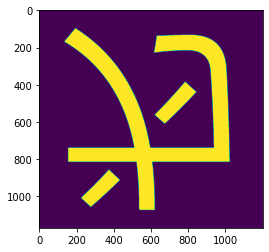

In [22]:
import Strokes as st
import HandImage as wi
import FormalImage as fi
import numpy as np
import matplotlib.pyplot as plt

character = '\u4e3a'

charImg = fi.renderChar(character, show=True, fontsize=1000)
plt.imshow(charImg)

(1169, 1200)
0.596078431372549


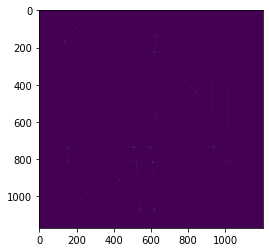

In [71]:
#go through each pixel and count it's white and black neighbors, then each cell value is abs(blackCount - whiteCount)
diffImg = np.zeros(np.shape(charImg))
imgColor = charImg.copy() #black is set to 1 already
imgColor[charImg == 0] = -1 #set white pixels to -1

print(np.shape(diffImg))

borderDiff = 8 #e.g. check up to borderDiff away from center, recommended value is 10
pad = 1 #ignore the border for this thickness
totalPad = borderDiff+pad
for xDiff in range(-borderDiff,1+borderDiff):
    for yDiff in range(-borderDiff,1+borderDiff):
        if(xDiff == 0 and yDiff == 0): #we don't count the center
            continue
        diffImg[totalPad:-totalPad, totalPad:-totalPad] += imgColor[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff]
diffImg = np.abs(diffImg)

#now determine which pixels are on the border (black but touches a white pixel, corner doesn't count)
borderImg = np.zeros(np.shape(charImg)) #zero is not a border
borderImg[1:-1, 1:-1][(charImg[1:-1, 1:-1] == 1) & (charImg[:-2, 1:-1] == 0)] = 1 #up direction
borderImg[1:-1, 1:-1][(charImg[1:-1, 1:-1] == 1) & (charImg[2:, 1:-1] == 0)] = 1 #down direction
borderImg[1:-1, 1:-1][(charImg[1:-1, 1:-1] == 1) & (charImg[1:-1, :-2] == 0)] = 1 #left direction
borderImg[1:-1, 1:-1][(charImg[1:-1, 1:-1] == 1) & (charImg[1:-1, 2:] == 0)] = 1 #right direction

#reset any pixels that aren't a border
diffImg[borderImg != 1] = 0
diffImg /= (borderDiff*2)**2 - 1 #ratio of total pixels counted

print(np.max(diffImg))
plt.imshow(diffImg)

plt.imsave("testImg.png", diffImg)

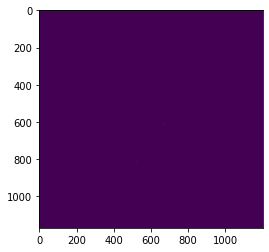

In [75]:
#now we have high values marked in each "corner", we need to select one pixel per corner
#select only global maximums
maxImg = np.zeros(np.shape(diffImg))
maxImg[diffImg > .15] = 1 #anything above a 15% difference is a canidate for being a corner
#check each neighboring pixel, and if it is higher, set the center pixel to zero

pad = 1
borderDiff = 5 #e.g. check up to borderDiff away from center for higher value, recommended value is 5
totalPad = borderDiff+pad
centerMask = diffImg[totalPad:-totalPad, totalPad:-totalPad]
for xDiff in range(-borderDiff,1+borderDiff):
    for yDiff in range(-borderDiff,1+borderDiff):
        if(xDiff == 0 and yDiff == 0): #we don't count the center
            continue
        offsetMask = diffImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff]
        maxImg[totalPad:-totalPad, totalPad:-totalPad][ centerMask < offsetMask ] = 0 #neighbor is higher value
maxImg[maxImg != 0] = 1 #1's are where corners are located

plt.imshow(maxImg)
plt.imsave("testImg2.png", maxImg)

In [77]:
#almost there now we need to remove ties, simplest way is just to give precedence to certain pixels
borderDiff = 5 #remove a tie if a pixel is found this close to another
for y in range(len(maxImg)):
    for x in range(len(maxImg[0])):
        if(maxImg[y,x] == 1):
            maxImg[y-borderDiff:y+borderDiff, x-borderDiff:x+borderDiff] = 0 #set all nearby to 0
            maxImg[y,x] = 1 #reset the center back to 1

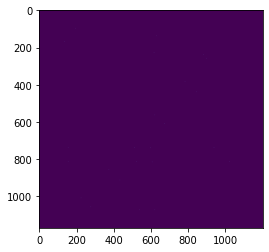

In [78]:
plt.imshow(maxImg)
plt.imsave("testImg2.png", maxImg)

In [73]:
np.where(maxImg == 1)
print(np.max(maxImg))

1.0
